# Подключение гугл диска и загрузка библиотек

In [ ]:
%%capture
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
# drive.flush_and_unmount()

Mounted at /content/drive/


In [ ]:
# %cd /content/drive/My Drive/

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle as pkl
import math
import torch
import os
import pandas as pd
import requests
import tensorflow as tf
import random
import glob
import gc
from ultralytics import YOLO
from tensorflow.keras.preprocessing.image import load_img, array_to_img, ImageDataGenerator, img_to_array
from glob import glob
from PIL import Image
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

In [ ]:
# import locale
# def getpreferredencoding(do_setlocale = True):
#     return "UTF-8"
# locale.getpreferredencoding = getpreferredencoding

In [ ]:
# !pip install --upgrade -q wandb
# import wandb
# wandb.login(key='f0f41469fc605f3a9ed5a041c2871fd155e82c9e')

# Подготовка папок временной сессии Colab

In [ ]:
# %cd /content/
# !mkdir images
# !mkdir labels
# !mkdir train
# %cd /content/train
# !mkdir images
# !mkdir labels
# %cd /content
# !mkdir valid
# %cd /content/valid
# !mkdir images
# !mkdir labels
# %cd /content/

/content
/content/train
/content
/content/valid
/content


In [ ]:
# уже аугментированные данные
%cd /content/
!unzip /content/drive/MyDrive/weeds.v5i.yolov8.zip

/content
Archive:  /content/drive/MyDrive/weeds.v5i.yolov8.zip
  inflating: data.yaml               
   creating: train/
   creating: train/images/
 extracting: train/images/-10_jpg.rf.0d167e02bc7d97b1c3315bdbf108a7b7.jpg  
 extracting: train/images/-10_jpg.rf.8fea2cf488f8b951b2c8f8893bd779aa.jpg  
 extracting: train/images/-10_jpg.rf.e07486a321cdc47b9c0cad647c010a25.jpg  
 extracting: train/images/-11_jpg.rf.26566f92cbf3dbf517d33e8d2b268795.jpg  
 extracting: train/images/-11_jpg.rf.3e2186f3698fe57d01b609c551dd2aad.jpg  
 extracting: train/images/-11_jpg.rf.79e78e02420ff97e53ba850ed37f1ded.jpg  
 extracting: train/images/-11_jpg.rf.7a8eb9098fe69261951bb4fdd33bb5d0.jpg  
 extracting: train/images/-11_jpg.rf.90663ea0badd813b378dac49b6906ac9.jpg  
 extracting: train/images/-11_jpg.rf.c13e79e7e6a6e6d76a9bd61ca80a76b3.jpg  
 extracting: train/images/-12_jpg.rf.0ea119dcb7256580791340b3a001999e.jpg  
 extracting: train/images/-12_jpg.rf.50789f8168b68bba0c9c2270c6a87ab0.jpg  
 extracting: tra

# Тренировка с помощью кросс-валидации

In [ ]:
!yolo segment train data=data.yaml model=yolov8l-seg.pt epochs=100 imgsz=640 batch=16 name=yolov8l-seg val=True

100% 88.1M/88.1M [00:01<00:00, 70.0MB/s]
Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8l-seg, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, f

In [ ]:
model = YOLO('/content/runs/segment/yolov8l-seg/weights/best.pt')


image 1/1 /content/valid/images/-6_jpg.rf.d40b48a6ccd7dd7eccbe84f29c9f73e1.jpg: 640x640 1 cirsium_0, 90.6ms
Speed: 2.1ms preprocess, 90.6ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)


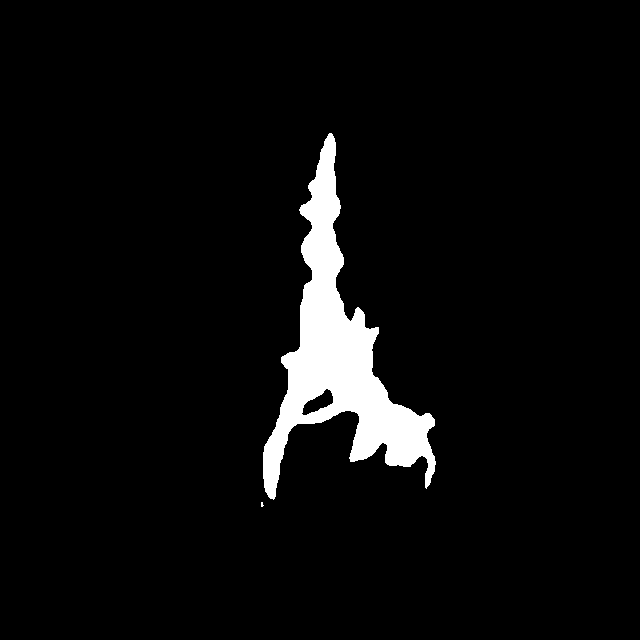

In [ ]:
res = model.predict('/content/valid/images/-6_jpg.rf.d40b48a6ccd7dd7eccbe84f29c9f73e1.jpg')
result = res[0]
masks = result.masks
mask1 = masks[0]
mask = mask1.data[0].detach().cpu().numpy()
polygon = mask1.xy[0]
mask_img = Image.fromarray(mask,"I")
mask_img